<a href="https://colab.research.google.com/github/coldbilberry/repo-gui/blob/main/%D0%9A%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%86%D0%B8%D1%8F_%D1%81_%D0%BF%D0%BE%D0%BC%D0%BE%D1%89%D1%8C%D1%8E_kNN_%D0%9A%D0%BB%D0%B0%D1%81%D1%82%D0%B5%D1%80%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F_K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.

In [1]:
import numpy as np
from sklearn import model_selection
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [2]:
X, y = load_iris(return_X_y=True)
X = X[:, :2]

In [3]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

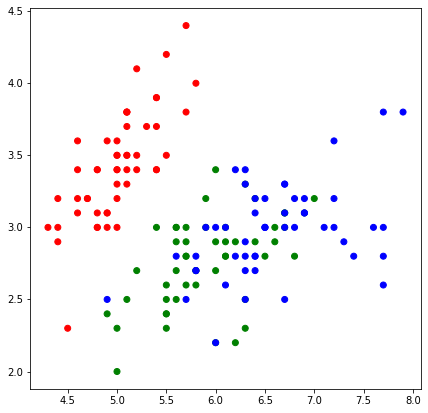

In [4]:
cmap = ListedColormap(['red', 'green', 'blue'])
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap);

In [5]:
def e_metrics(x1, x2):
    
    distance = 0
    for i in range(len(x1)):
        distance += np.square(x1[i] - x2[i])
    
    return np.sqrt(distance)

In [6]:
def knn(x_train, y_train, x_test, k):
    
    answers = []
    for x in x_test:
        test_distances = []
        
        for i in range(len(x_train)):
            distance = e_metrics(x, x_train[i])
            
            test_distances.append((distance, y_train[i]))
        
        classes = {class_item: 0 for class_item in set(y_train)}
        
        for d in sorted(test_distances)[:k]:
            classes[d[1]] += 1
            
        answers.append(sorted(classes, key=classes.get)[-1])
        
    return answers

In [7]:
def accuracy(pred, y):
    return (sum(pred==y)/len(y))

In [8]:
def get_graph(X_train, y_train, k):
    
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])

    h = 0.02

    # Расчет пределов графика
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Получим предсказания для всех точек
    Z = knn(X_train, y_train, np.c_[xx.ravel(), yy.ravel()], k)

    # Построим график
    Z = np.array(Z).reshape(xx.shape)
    plt.figure(figsize=(7,7))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Добавим на график обучающую выборку
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"Трехклассовая kNN классификация при k = {k}")
    plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Unrecognized location 'train|test'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


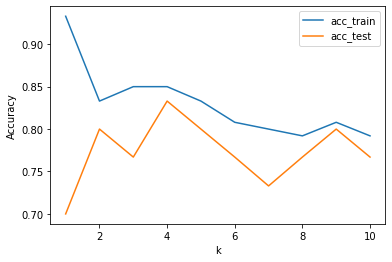

0.933 0.833


(0, 3)

In [9]:
def best_k_plot(X_train, X_test, n = 10):
    acc_train = []
    acc_test = []
    n+=1
    for k in range(1,n):
#         print(k)
        y_pred = knn(X_train, y_train, X_train, k)
        acc_train_i = round(accuracy(y_pred, y_train), 3)
    #     print(f'Точность на train knn при k = {k}: {acc_train_i}')
        acc_train.append(acc_train_i)

        y_pred = knn(X_train, y_train, X_test, k)
        acc_test_i = round(accuracy(y_pred, y_test), 3)
    #     print( f'Точность knn при k = {k}: {acc_test_i}')
        acc_test.append(acc_test_i)
    #     print('---')

    k_ax = [i for i in range(1,n)] 
    # print(k_ax)
    plt.xlabel('k')
    plt.ylabel('Accuracy')
    plt.plot(k_ax, acc_train, label='acc_train')
    plt.plot(k_ax, acc_test, label='acc_test')
    plt.legend(loc='train|test')
    plt.show()
    
    best_k = (acc_train.index(max(acc_train)), acc_test.index(max(acc_test)))
#     print(best_k)
    print(max(acc_train), max(acc_test))
    return best_k

best_k_plot(X_train, X_test, n = 10)

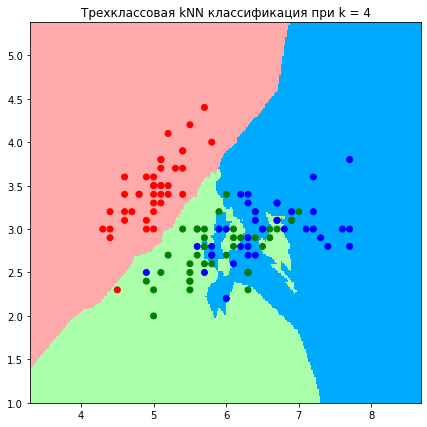

In [10]:
get_graph(X_train, y_train, 4)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Unrecognized location 'train|test'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


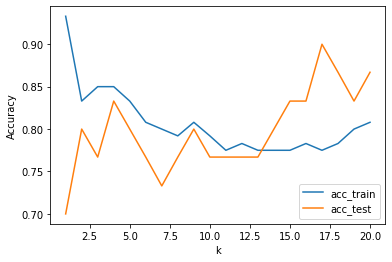

0.933 0.9


(0, 16)

In [11]:
n = 20


best_k_plot(X_train, X_test, n)

In [12]:
def calc_weight(distance):
    a = 1e-5
    weight = 1 / (distance + a)
    return weight

In [13]:
def calc_weight(distance):
    '''
    Расчёт весов по дистанции между объектами
    '''
    
    a = 1e-7
#     weight = 1 / (distance + a)
    weight = 1/(np.sqrt(distance) + a)
    return weight

In [14]:
def calc_weight(distance, q = 0.3):
    '''
    Расчёт весов по степени дистанции между объектами
    
    '''
    
    a = 1e-7
#     weight = 1 / (distance + a)
    weight = q ** distance
    return weight

In [15]:
from itertools import combinations

def calc_prediction(weights):
    weighted_sum = 0
    weight_product = 1
    combination_sum = 0

    for value, weight in weights.items():
        weighted_sum += value/weight
        weight_product *= weight
#     print(weights)
#     print(weights.values())
    
    for x in list(combinations(weights.values(), len(weights.values())-1)):
        combination_sum += np.prod(x)

    prediction = (weight_product/combination_sum) * weighted_sum

    return prediction

In [16]:
def knn(x_train, y_train, x_test, k):
    
    answers = []
    for x in x_test:
        test_distances = []
            
        for i in range(len(x_train)):
            
            # расчет расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            distance = e_metrics(x, x_train[i])
            
            # Записываем в список значение расстояния и ответа на объекте обучающей выборки
            test_distances.append((distance, y_train[i]))
        

        # Сортируем список и среди первых k элементов подсчитаем веса этих элементов, основанные на дистанции до них
        weights = {}
        for d in sorted(test_distances)[:k]:
            weights[d[1]] = calc_weight(d[0])
            
        answers.append(calc_prediction(weights))
        
    return answers

In [17]:
pred = knn(X_train, y_train, X_test, 4)
accuracy(pred, y_test)

0.4

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Unrecognized location 'train|test'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


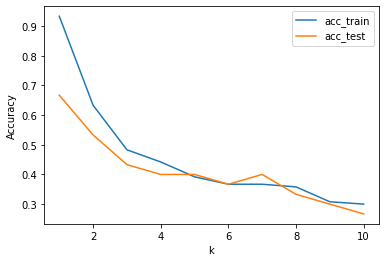

0.933 0.667


(0, 0)

In [18]:
n = 10
best_k_plot(X_train, X_test, n)

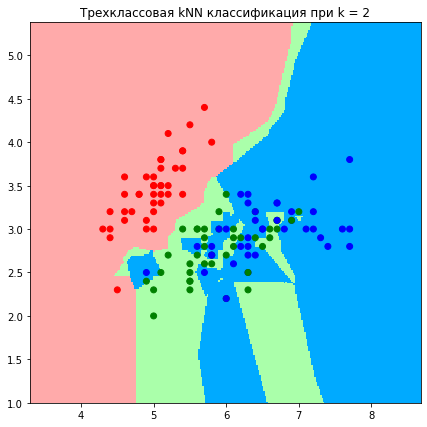

In [20]:
get_graph(X_train, y_train, 2)

In [21]:
k = 2

y_pred = knn(X_train, y_train, X_test, k)

print(f'Точность алгоритма при k = {k}: {accuracy(y_test, y_pred):.3f}')

Точность алгоритма при k = 2: 0.533


2.

In [22]:
def kmeans(data, k, max_iterations, min_distance):
    
    classes = {i: [] for i in range(k)}
    
    centroids = [data[i] for i in range(k)]
    
    for _ in range(max_iterations):
        for x in data:
            distances = [e_metrics(x, centroid) for centroid in centroids]
            classification = distances.index(min(distances))
            classes[classification].append(x)
            
        old_centroids = centroids.copy()
        
        for classification in classes:
            centroids[classification] = np.average(classes[classification], axis=0)
            
        optimal = True
        for centroid in range(len(centroids)):
            if np.sum(np.abs((centroids[centroid] - old_centroids[centroid])/old_centroids * 100)) > min_distance:
                optimal = False
        
        if optimal:
            break
            
    return old_centroids, classes

In [23]:
def visualize(centroids, classes):
    colors = ['r', 'g', 'b']
    
    plt.figure(figsize=(7,7))

    for centroid in centroids:
        plt.scatter(centroid[0], centroid[1], marker='x', s=130, c='black')

    for class_item in classes:
        for x in classes[class_item]:
            plt.scatter(x[0], x[1], color=colors[class_item])
            
    plt.show()

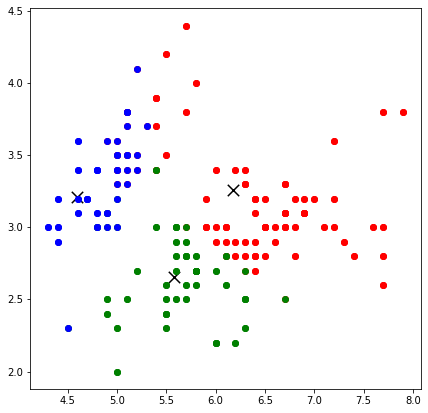

In [24]:
max_iterations = 2
min_distance = 1e-4
k = 3

centroids, clusters = kmeans(X, k, max_iterations, min_distance)
visualize(centroids, clusters)

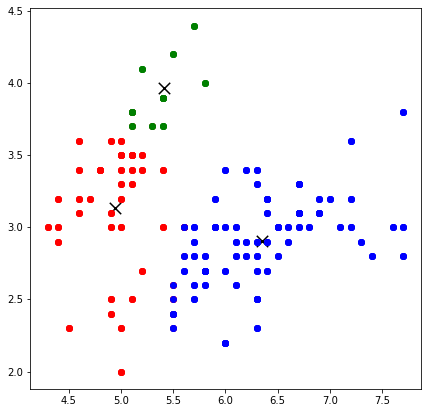

In [25]:
max_iterations = 3
min_distance = 1e-4
k = 3

centroids, clusters = kmeans(X_train, k, max_iterations, min_distance)
visualize(centroids, clusters)

In [26]:
def calc_inner_distance(centroids, clusters):
    distances = np.zeros(len(centroids))
    result = 0

    for i, centroid in enumerate(centroids):
        for x in clusters[i]:
            distances[i] += e_metrics(x, centroid)**2
        result += distances[i] / len(clusters[i])
    return result

In [27]:
def cluster_index(centroids, clusters):
    '''
    Расчет среднеквадратичного расстояния в кластере
    '''
    distances = np.zeros(len(centroids))
    result = 0
    
    for i, centroid in enumerate(centroids):
        for x in clusters[i]:
            distances[i] += e_metrics(x, centroid)**2
        result += distances[i] / len(clusters[i])
    return result

In [28]:
'''
Расчет среднеквадратичного расстояния в кластере
'''

distances = np.zeros(len(centroids))
print(distances)
result = 0
for i, centroid in enumerate(centroids):
    print(i, centroid )
    for x in clusters[i]:
        distances[i] += e_metrics(x, centroid)**2
    result += distances[i] / len(clusters[i])
print(result)

[0. 0. 0.]
0 [4.9375  3.13375]
1 [5.41111111 3.96666667]
2 [6.35070423 2.90633803]
0.8187513269643869


In [29]:
clusters_count_list = list(range(1,11))

cls = [kmeans(X_train, k, max_iterations, min_distance) for k in clusters_count_list]

inner_distances = [calc_inner_distance(centroids, clusters) for centroids, clusters in cls]

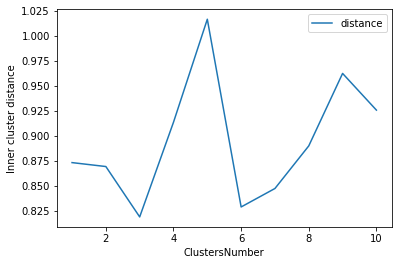

In [30]:
plt.xlabel('ClustersNumber')
plt.ylabel('Inner cluster distance')
plt.plot(clusters_count_list, inner_distances, label='distance')
plt.legend(loc='upper right')
plt.show()